# <ins>SynCluster: Word-pair similarity scoring model</ins>
## This is the notebook to train/implement SynCluster. For more details on how the algorithm works, [click here](https://www.canva.com/design/DAF4FnAFa90/g-zJXlF7war6uQSxy4PLOw/edit?utm_content=DAF4FnAFa90&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)
### Note: If you want to directly test out the saved model on SimLex-999, Just run the notebook from the 5th subsection(Testing phase) till the end. If you wish to train from scratch with different hyperparameters, start from here.

In [ ]:
!pip install numpy nltk pickle joblib scikit-learn

In [ ]:
import nltk
nltk.download("all")

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pickle
import pandas as pd
df = pd.read_csv("reviews.csv")
df = df["Text"]
combined_string = ' '.join(df.astype(str))

In [24]:
len(combined_string)

248540641

# <ins>1.Preprocessing the corpus:</ins>

## 250 million tokens is too large for the constrained task size of 1 million. lets truncate it.

In [25]:
target_word_count = 1000000
current_word_list = combined_string.split()
truncated_word_list = current_word_list[:target_word_count]
new_combined_string = ' '.join(truncated_word_list)

In [26]:
print(len(new_combined_string.split()))

1000000


## Tokenizing all the words in the corpus using NLTK's word_tokenize() function:

In [27]:
tokens = word_tokenize(new_combined_string)
tokens[:100]

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 '.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 '.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most',
 '.',
 'Product',
 'arrived',
 'labeled',
 'as',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'the',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'unsalted',
 '.',
 'Not',
 'sure',
 'if',
 'this',
 'was',
 'an',
 'error',
 'or',
 'if',
 'the',
 'vendor',
 'intended',
 'to',
 'represent',
 'the',
 'product',
 'as',
 '``',
 'Jumbo',
 "''",
 '.',
 'This',
 'is',
 'a',
 'confection',
 'that',
 'has',
 'been',
 'around',
 'a',
 'few',
 'centuries',
 '.']

## Removing Stopwords:

In [28]:
stop_words = set(stopwords.words('english'))
filt_tokens = [word for word in tokens if word.lower() not in stop_words]
filt_tokens[:100]

['bought',
 'several',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'found',
 'good',
 'quality',
 '.',
 'product',
 'looks',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 '.',
 'Labrador',
 'finicky',
 'appreciates',
 'product',
 'better',
 '.',
 'Product',
 'arrived',
 'labeled',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'peanuts',
 'actually',
 'small',
 'sized',
 'unsalted',
 '.',
 'sure',
 'error',
 'vendor',
 'intended',
 'represent',
 'product',
 '``',
 'Jumbo',
 "''",
 '.',
 'confection',
 'around',
 'centuries',
 '.',
 'light',
 ',',
 'pillowy',
 'citrus',
 'gelatin',
 'nuts',
 '-',
 'case',
 'Filberts',
 '.',
 'cut',
 'tiny',
 'squares',
 'liberally',
 'coated',
 'powdered',
 'sugar',
 '.',
 'tiny',
 'mouthful',
 'heaven',
 '.',
 'chewy',
 ',',
 'flavorful',
 '.',
 'highly',
 'recommend',
 'yummy',
 'treat',
 '.',
 'familiar',
 'story',
 'C.S',
 '.',
 'Lewis',
 "'",
 '``',
 'Lion',
 ',',
 'Witch',
 ',',
 'Wardrobe',
 "''",
 '-',
 'treat',
 'seduces

## Making the tokens lowercased and removing special characters like [,"./$] etc

In [29]:
import string
normalized_tokens = [word.lower() for word in filt_tokens if word.isalpha()]
normalized_tokens[:100]

['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'found',
 'good',
 'quality',
 'product',
 'looks',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better',
 'product',
 'arrived',
 'labeled',
 'jumbo',
 'salted',
 'peanuts',
 'peanuts',
 'actually',
 'small',
 'sized',
 'unsalted',
 'sure',
 'error',
 'vendor',
 'intended',
 'represent',
 'product',
 'jumbo',
 'confection',
 'around',
 'centuries',
 'light',
 'pillowy',
 'citrus',
 'gelatin',
 'nuts',
 'case',
 'filberts',
 'cut',
 'tiny',
 'squares',
 'liberally',
 'coated',
 'powdered',
 'sugar',
 'tiny',
 'mouthful',
 'heaven',
 'chewy',
 'flavorful',
 'highly',
 'recommend',
 'yummy',
 'treat',
 'familiar',
 'story',
 'lewis',
 'lion',
 'witch',
 'wardrobe',
 'treat',
 'seduces',
 'edmund',
 'selling',
 'brother',
 'sisters',
 'witch',
 'looking',
 'secret',
 'ingredient',
 'robitussin',
 'believe',
 'found',
 'got',
 'addition',
 '

## Converting all the tokens into their respective lemmas:

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemma_tokens = [lemmatizer.lemmatize(word, pos='v') for word in normalized_tokens]
lemma_tokens[:100]

['buy',
 'several',
 'vitality',
 'can',
 'dog',
 'food',
 'products',
 'find',
 'good',
 'quality',
 'product',
 'look',
 'like',
 'stew',
 'process',
 'meat',
 'smell',
 'better',
 'labrador',
 'finicky',
 'appreciate',
 'product',
 'better',
 'product',
 'arrive',
 'label',
 'jumbo',
 'salt',
 'peanuts',
 'peanuts',
 'actually',
 'small',
 'size',
 'unsalted',
 'sure',
 'error',
 'vendor',
 'intend',
 'represent',
 'product',
 'jumbo',
 'confection',
 'around',
 'centuries',
 'light',
 'pillowy',
 'citrus',
 'gelatin',
 'nut',
 'case',
 'filberts',
 'cut',
 'tiny',
 'square',
 'liberally',
 'coat',
 'powder',
 'sugar',
 'tiny',
 'mouthful',
 'heaven',
 'chewy',
 'flavorful',
 'highly',
 'recommend',
 'yummy',
 'treat',
 'familiar',
 'story',
 'lewis',
 'lion',
 'witch',
 'wardrobe',
 'treat',
 'seduce',
 'edmund',
 'sell',
 'brother',
 'sisters',
 'witch',
 'look',
 'secret',
 'ingredient',
 'robitussin',
 'believe',
 'find',
 'get',
 'addition',
 'root',
 'beer',
 'extract',
 'orde

In [31]:
lemma_tokens = list(set(lemma_tokens))
label_len = len(lemma_tokens)
tokens_copy = lemma_tokens.copy()
len(tokens_copy)

16307

## Copying the tokens into lists for synonym and antonym vector space tokens:

In [32]:
syn_tokens = lemma_tokens.copy()
ant_tokens = lemma_tokens.copy()

# <ins>2.Creating word embeddings<ins>

## Initializing the tokens with randomized 10 dimensional vectors

In [33]:
import numpy as np 
import random
from nltk.corpus import wordnet as wn
count=0
embedding_map = []
centroids = np.random.rand(label_len, 10)
centroids

array([[0.71597763, 0.32329174, 0.16227735, ..., 0.05182732, 0.01646589,
        0.00383804],
       [0.65372941, 0.58084159, 0.09313578, ..., 0.11114382, 0.99253525,
        0.91035849],
       [0.24945986, 0.67862668, 0.36260136, ..., 0.32343529, 0.41955029,
        0.48883998],
       ...,
       [0.80106781, 0.39382393, 0.93489068, ..., 0.42426021, 0.50687521,
        0.83580299],
       [0.59195858, 0.28207923, 0.63367607, ..., 0.56805468, 0.15310398,
        0.56286204],
       [0.92222186, 0.14300114, 0.43372546, ..., 0.23460251, 0.29513231,
        0.1661881 ]])

In [34]:
len(lemma_tokens)

16307

## Copying the vectors into antonym and synonym vector spaces

In [35]:
ant_vec = centroids.copy()
syn_vec = centroids.copy()

In [36]:
syn_vec

array([[0.71597763, 0.32329174, 0.16227735, ..., 0.05182732, 0.01646589,
        0.00383804],
       [0.65372941, 0.58084159, 0.09313578, ..., 0.11114382, 0.99253525,
        0.91035849],
       [0.24945986, 0.67862668, 0.36260136, ..., 0.32343529, 0.41955029,
        0.48883998],
       ...,
       [0.80106781, 0.39382393, 0.93489068, ..., 0.42426021, 0.50687521,
        0.83580299],
       [0.59195858, 0.28207923, 0.63367607, ..., 0.56805468, 0.15310398,
        0.56286204],
       [0.92222186, 0.14300114, 0.43372546, ..., 0.23460251, 0.29513231,
        0.1661881 ]])

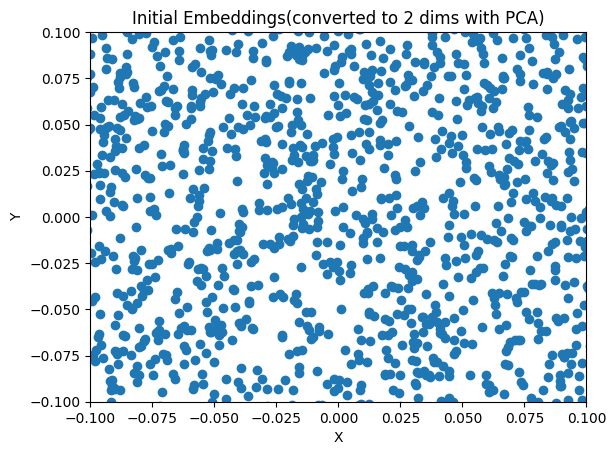

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(centroids)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Initial Embeddings(converted to 2 dims with PCA)')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

plt.show()

## Assigning synonym embeddings around initial centroid embeddings using wordnet synsets
Note: I used only the synonym vector space for this. Antonym adjustment can be a future improvement to this notebook code

In [43]:
tok_len = len(lemma_tokens)
count = 0
clusters = []
for i in range(tok_len-1):
    x = wn.synsets(lemma_tokens[i])
    clusters.append(x)
    syn = []
    ant = []
    for s in x:
        for l in s.lemmas():
            syn.append(l.name())
    syn = list(set(syn))
    ant = list(set(ant))
    for ss in syn:
        count+=1
        syn_tokens.append(ss)
        r = random.uniform(-1e-15,1e-15)
        syn_vec = np.append(syn_vec, centroids[i].reshape([1,-1])+r,axis=0)
print(len(syn_vec))
print(count)

92683
76376


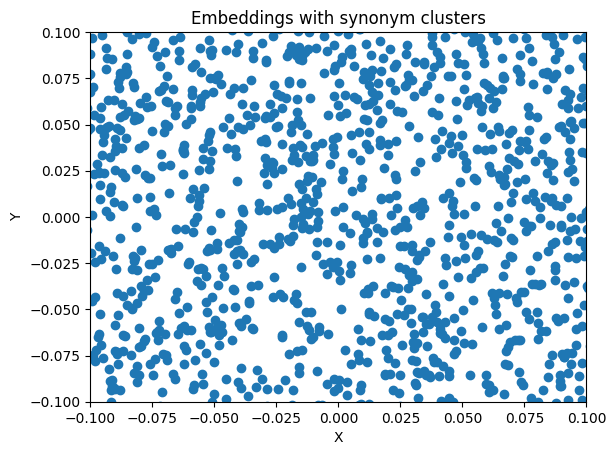

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(centroids)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Embeddings with synonym clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

plt.show()

# <ins>3.Cluster merging</ins>

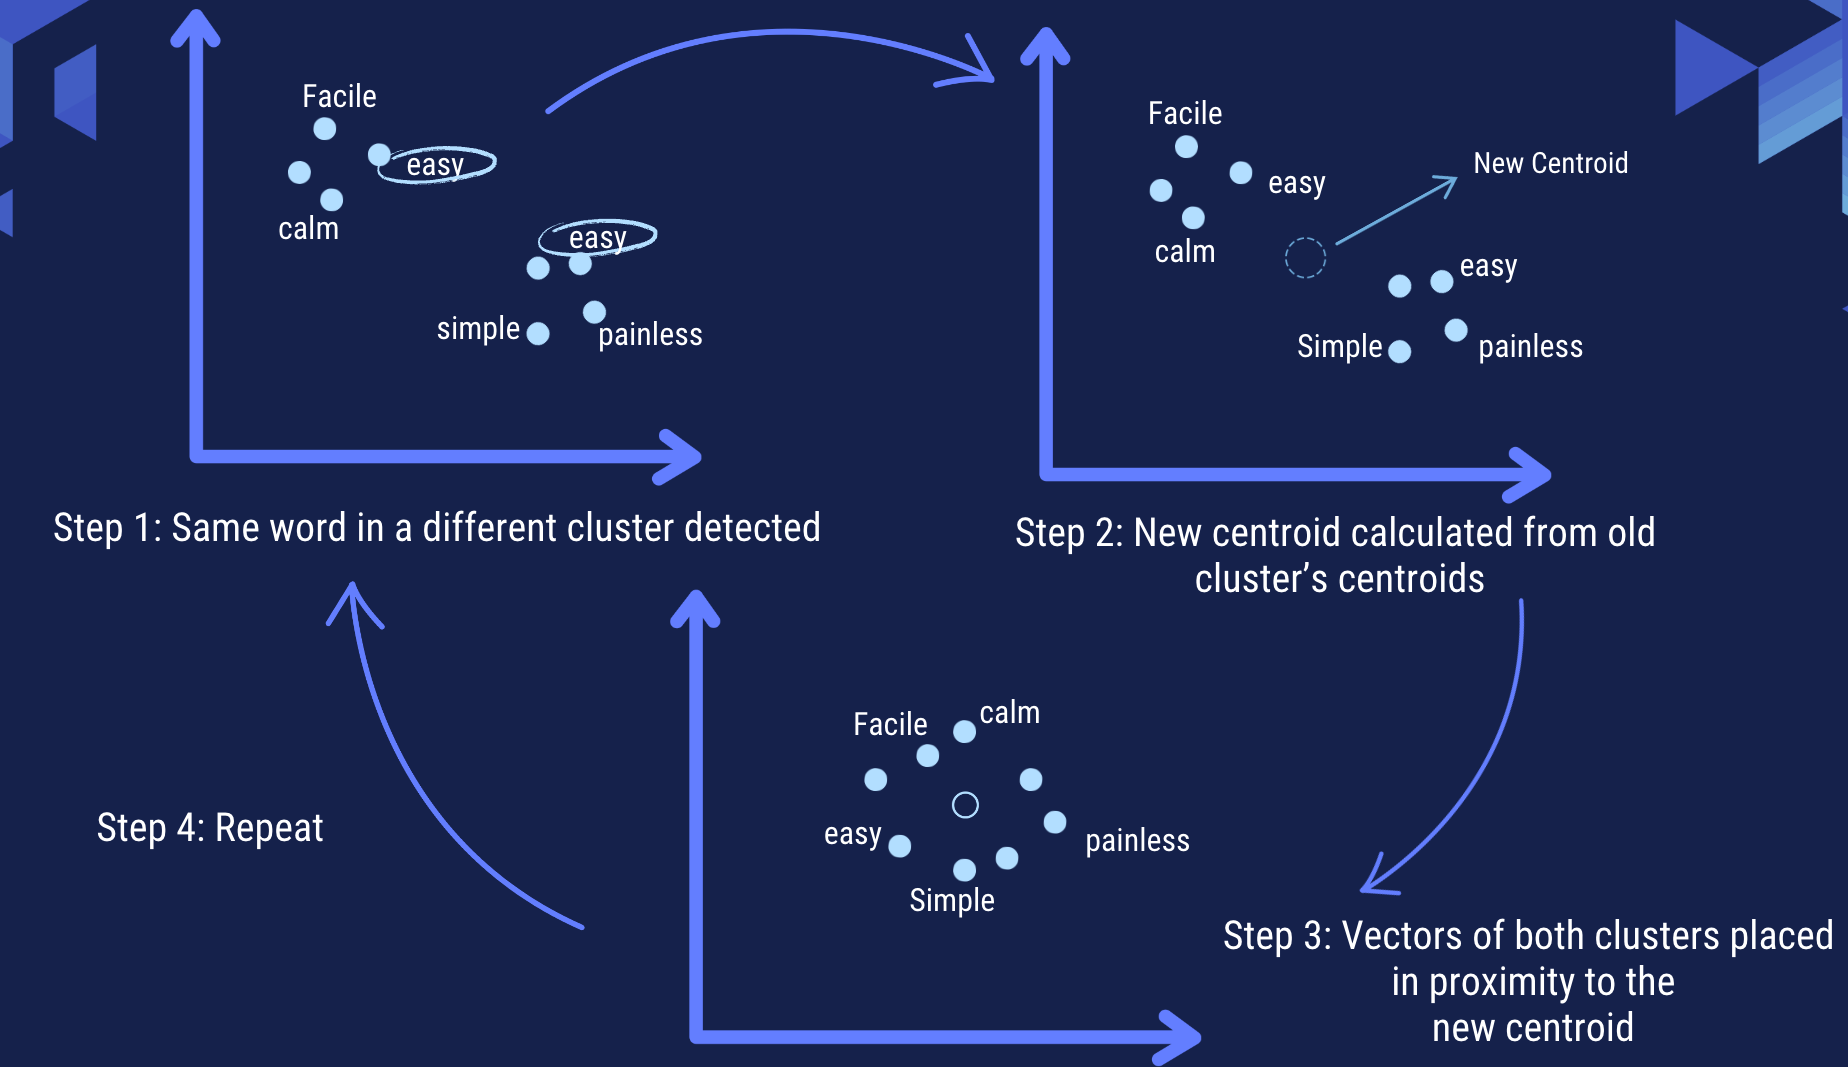

## In the following steps, we find the common words among all the clusters and put them in a dictionary, with keys as the words and values as the list of cluster centroids where they occur. We then calculate the new centroid based on all occurence clusters and then finally assign all the vectors around the new centroid

In [18]:
rem_empty_clusters = [x for x in clusters if x]
def synset_to_words(synset):
    return synset.lemmas()[0].name().lower()
rem_pos_clusters = [[synset_to_words(synset) for synset in synsets] for synsets in clusters]
final_cluster_items = rem_pos_clusters
final_cluster_items

[['buggy', 'balmy', 'buggy'],
 ['satyr'],
 ['measure', 'evaluate'],
 ['hazard', 'luck', 'hazard', 'guess', 'venture', 'gamble'],
 ['soup', 'soup', 'soup', 'soup'],
 [],
 ['radiance',
  'reflect',
  'shine',
  'glitter',
  'shine',
  'shine',
  'glow',
  'shine',
  'fall',
  'glow',
  'polish'],
 ['thirty', 'thirty'],
 ['monosodium_glutamate'],
 ['hospital', 'hospital'],
 ['bloom', 'blush', 'blush', 'blush'],
 ['family'],
 ['antacid', 'antacid'],
 [],
 [],
 ['oktoberfest', 'oktoberfest'],
 ['lily'],
 ['electric_refrigerator'],
 ['lay_waste_to', 'devastate'],
 ['optimum', 'optimum'],
 ['exist'],
 [],
 ['pie', 'proto-indo_european'],
 ['deplore'],
 ['obviously'],
 ['motherhood'],
 ['alteration', 'modification', 'modification', 'change'],
 ['marry', 'marry'],
 ['sweet',
  'angelic',
  'dulcet',
  'sweet',
  'gratifying',
  'odoriferous',
  'sweet',
  'fresh',
  'fresh',
  'sugared'],
 [],
 ['omnipresent'],
 ['thence', 'thence'],
 ['humanely'],
 ['guideline', 'road_map', 'guidepost'],
 ['pi

In [19]:
for i in range(len(final_cluster_items)):
    final_cluster_items[i].append(tokens_copy[i])
    final_cluster_items[i] = list(set(final_cluster_items[i]))
final_cluster_items

[['buggy', 'balmy'],
 ['satyr', 'leches'],
 ['measure', 'evaluate'],
 ['venture', 'guess', 'hazard', 'luck', 'gamble'],
 ['soup'],
 ['oversteeping'],
 ['radiance', 'reflect', 'glitter', 'shine', 'polish', 'glow', 'fall'],
 ['thirty'],
 ['msgs', 'monosodium_glutamate'],
 ['hospital'],
 ['blush', 'bloom'],
 ['household', 'family'],
 ['antacid'],
 ['jamun'],
 ['kroger'],
 ['oktoberfest'],
 ['lilies', 'lily'],
 ['electric_refrigerator', 'fridge'],
 ['lay_waste_to', 'devastate'],
 ['optimum'],
 ['subsist', 'exist'],
 ['dewormer'],
 ['proto-indo_european', 'pie', 'pies'],
 ['bemoan', 'deplore'],
 ['obviously'],
 ['motherhood'],
 ['modification', 'alteration', 'change'],
 ['marry'],
 ['odoriferous',
  'sweet',
  'dulcet',
  'angelic',
  'gratifying',
  'sugared',
  'sweeter',
  'fresh'],
 ['monsanto'],
 ['omnipresent', 'ubiquitous'],
 ['therefrom', 'thence'],
 ['humanely'],
 ['road_map', 'guidepost', 'guideline', 'guidelines'],
 ['pilaf'],
 ['vacation', 'holiday'],
 ['fluid', 'runnier'],
 ['n

In [20]:
def find_word_indices_recursive(my_list):
    word_indices_dict = {}

    for i, sublist in enumerate(my_list):
        for word in sublist:
            if word not in word_indices_dict:
                word_indices_dict[word] = []

            for j, other_sublist in enumerate(my_list):
                if j != i and word in other_sublist and j not in word_indices_dict[word]:
                    word_indices_dict[word].append(j)

    return word_indices_dict
result1 = find_word_indices_recursive(final_cluster_items)
result1

{'buggy': [],
 'balmy': [4572,
  6721,
  7196,
  9063,
  9084,
  10089,
  12158,
  12863,
  14239,
  14335,
  15321,
  0],
 'satyr': [],
 'leches': [],
 'measure': [2269, 4486, 4618, 7616, 10564, 14176, 14240, 2],
 'evaluate': [7573, 2],
 'venture': [3700, 5459, 5510, 10439, 3],
 'guess': [4807, 5510, 8126, 8216, 10267, 15565, 16094, 3],
 'hazard': [7401, 3],
 'luck': [357, 411, 1684, 4805, 5202, 3],
 'gamble': [411, 5816, 7401, 10439, 3],
 'soup': [],
 'oversteeping': [],
 'radiance': [14590, 6],
 'reflect': [15519, 6],
 'glitter': [1252, 1693, 11618, 13978, 6],
 'shine': [11040, 6],
 'polish': [2529, 6283, 9770, 9881, 10879, 11889, 13813, 15092, 6],
 'glow': [11040, 14590, 6],
 'fall': [2649,
  3713,
  3960,
  6905,
  7305,
  7916,
  10210,
  11187,
  11240,
  13282,
  13533,
  13572,
  6],
 'thirty': [13894, 7],
 'msgs': [],
 'monosodium_glutamate': [14693, 8],
 'hospital': [],
 'blush': [978, 3362, 10],
 'bloom': [978, 2233, 4951, 6412, 10],
 'household': [],
 'family': [5368, 6300

In [21]:
def vector_iter(cluster_list, index_dict):
    count = 0
    for word in list(index_dict.keys()):
        temp_list = []
        res = index_dict[word]
        for sublist in res:
            for word in cluster_list[sublist]:
                temp_list.append(word)
        temp_list = list(set(temp_list))
        vector_list = [syn_vec[syn_tokens.index(word)] for word in temp_list if word in syn_tokens]
        centroid = np.mean(vector_list, axis=0)
        new_vecs = []
        for vecs in vector_list:
            x = random.uniform(-1e-15, 1e-15)
            new_vecs.append(centroid + x)
        for i, vecs in enumerate(new_vecs):
            word_index = syn_tokens.index(temp_list[i]) if temp_list[i] in syn_tokens else None
            if word_index is not None:
                syn_vec[word_index] = vecs
        count += 1
        print(f"Iter : {count}")

vector_iter(final_cluster_items, result1)

/Users/mohdzeeshan/PreCog Task/precog/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mohdzeeshan/PreCog Task/precog/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iter : 1
Iter : 2
Iter : 3
Iter : 4
Iter : 5
Iter : 6
Iter : 7
Iter : 8
Iter : 9
Iter : 10
Iter : 11
Iter : 12
Iter : 13
Iter : 14
Iter : 15
Iter : 16
Iter : 17
Iter : 18
Iter : 19
Iter : 20
Iter : 21
Iter : 22
Iter : 23
Iter : 24
Iter : 25
Iter : 26
Iter : 27
Iter : 28
Iter : 29
Iter : 30
Iter : 31
Iter : 32
Iter : 33
Iter : 34
Iter : 35
Iter : 36
Iter : 37
Iter : 38
Iter : 39
Iter : 40
Iter : 41
Iter : 42
Iter : 43
Iter : 44
Iter : 45
Iter : 46
Iter : 47
Iter : 48
Iter : 49
Iter : 50
Iter : 51
Iter : 52
Iter : 53
Iter : 54
Iter : 55
Iter : 56
Iter : 57
Iter : 58
Iter : 59
Iter : 60
Iter : 61
Iter : 62
Iter : 63
Iter : 64
Iter : 65
Iter : 66
Iter : 67
Iter : 68
Iter : 69
Iter : 70
Iter : 71
Iter : 72
Iter : 73
Iter : 74
Iter : 75
Iter : 76
Iter : 77
Iter : 78
Iter : 79
Iter : 80
Iter : 81
Iter : 82
Iter : 83
Iter : 84
Iter : 85
Iter : 86
Iter : 87
Iter : 88
Iter : 89
Iter : 90
Iter : 91
Iter : 92
Iter : 93
Iter : 94
Iter : 95
Iter : 96
Iter : 97
Iter : 98
Iter : 99
Iter : 100
Iter : 1

## Saving the vectors space

In [23]:
np.save('vectors.npy', syn_vec)
syn_vec.shape

(92689, 30)

## And the Vocab

In [24]:
with open('vocab.pkl', 'wb') as file:
    pickle.dump(syn_tokens, file)

# <ins>4.Model training</ins>
## We train a K-means model to solidfy the newly assigned clusters

In [25]:
from sklearn.cluster import KMeans
n_clusters = label_len
kmeans = KMeans(n_clusters=n_clusters, random_state=42, verbose=1)
model = kmeans.fit(syn_vec)
labels = model.predict(syn_vec[syn_tokens.index('easy')].reshape(1,-1))
print(labels)

/Users/mohdzeeshan/PreCog Task/precog/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 2083.248251975621.
Iteration 1, inertia 1722.8365436568915.
Iteration 2, inertia 1713.987882216311.
Iteration 3, inertia 1711.9917262411473.
Iteration 4, inertia 1710.8969016596386.
Iteration 5, inertia 1710.1812602693014.
Iteration 6, inertia 1709.8672555845174.
Iteration 7, inertia 1709.5790869197945.
Iteration 8, inertia 1709.2702192526403.
Iteration 9, inertia 1708.909218868489.
Iteration 10, inertia 1708.7656363240144.
Iteration 11, inertia 1708.681261359153.
Iteration 12, inertia 1708.6519569518605.
Iteration 13, inertia 1708.6102610130756.
Iteration 14, inertia 1708.5726120426343.
Iteration 15, inertia 1708.5364227854302.
Iteration 16, inertia 1708.4932794430856.
Iteration 17, inertia 1708.4867434488183.
Iteration 18, inertia 1708.4762576062835.
Converged at iteration 18: center shift 5.818860956832674e-06 within tolerance 7.478888027466972e-06.
Initialization complete
Iteration 0, inertia 2092.02833762391.
Iteration 1, inertia 1721.0

## Saving the model in joblib format

In [26]:
import joblib
joblib.dump(model, 'kmeans_model.joblib')

['kmeans_model.joblib']

# <ins>5.Model Testing</ins>

## I have already saved the embedding model locally for the sake of convinience. The following code loads the local embeddings model. Run the following cells till the end to test it out on the SimLex-999 dataset.

In [8]:
import joblib
import pickle
import numpy as np
loaded_model = joblib.load('kmeans_model.joblib')

## Cluster centres of the k-means model

In [4]:
cluster_centers = loaded_model.cluster_centers_
cluster_centers

array([[0.04765937, 0.02644112, 0.36445693, ..., 0.62813269, 0.88938394,
        0.06351677],
       [0.4979104 , 0.54472718, 0.481625  , ..., 0.61106914, 0.45958843,
        0.53496629],
       [0.65266046, 0.31163002, 0.48760348, ..., 0.28275473, 0.01947792,
        0.35223464],
       ...,
       [0.81872283, 0.79164365, 0.21867094, ..., 0.20726597, 0.91698191,
        0.03204442],
       [0.11733451, 0.32663558, 0.39863294, ..., 0.40885497, 0.85540488,
        0.3540878 ],
       [0.36569517, 0.43051552, 0.96773842, ..., 0.16636452, 0.19541221,
        0.78763148]])

## Loading the vocabulary and vectors

In [9]:
with open('vocab.pkl', 'rb') as file:
    vocab = pickle.load(file)
vectors = np.load('vectors.npy')
labels = loaded_model.predict(vectors[vocab.index('stupid')].reshape(1,-1))
print(labels)

[183]


## Loading and preprocessing the dataset

In [10]:
import pandas as pd
df = pd.read_csv("SimLex-999.txt", sep='\t')
df = df[['word1','word2','SimLex999']]
df

,word1,word2,SimLex999
0,old,new,1.58
1,smart,intelligent,9.20
2,hard,difficult,8.77
3,happy,cheerful,9.55
4,hard,easy,0.95
...,...,...,...
994,join,acquire,2.85
995,send,attend,1.67
996,gather,attend,4.80
997,absorb,withdraw,2.97


## Removing rows from the dataset for which the either of the word from the word-pair doesn't exist in our vocabulary

In [11]:
filtered_df = df[df['word1'].isin(vocab) & df['word2'].isin(vocab)]
filtered_df

,word1,word2,SimLex999
0,old,new,1.58
1,smart,intelligent,9.20
2,hard,difficult,8.77
4,hard,easy,0.95
5,fast,rapid,8.75
...,...,...,...
994,join,acquire,2.85
995,send,attend,1.67
996,gather,attend,4.80
997,absorb,withdraw,2.97


In [12]:
word1_list = filtered_df['word1'].tolist()
word2_list = filtered_df['word2'].tolist()
target = filtered_df['SimLex999'].tolist()

## Finding the Euclidean distance and normalized similarity scores for each word-pair

In [13]:
predictions = []
for i in range(len(word1_list)):
    vec1 = cluster_centers[list(loaded_model.predict(vectors[vocab.index(word1_list[i])].reshape(1,-1)))]
    vec2 = cluster_centers[list(loaded_model.predict(vectors[vocab.index(word2_list[i])].reshape(1,-1)))]
    euclidean_distance = np.linalg.norm(vec1 - vec2)
    similarity = 1 / (1 + euclidean_distance)
    predictions.append(similarity)
predictions

[0.6710947056482863,
 0.8240866290117833,
 0.8306264473800085,
 0.8495969671970028,
 0.8530623150312777,
 1.0,
 0.7455074316225105,
 0.50898646101027,
 0.4561814396800052,
 0.9221685704379622,
 0.8530623150312777,
 0.8885292847176978,
 0.8530623150312777,
 0.7886266686735908,
 0.8458709892360421,
 0.7618531491535463,
 0.561434599299605,
 0.5242704489791,
 0.8530623150312777,
 0.7463933529413246,
 0.6889358327030103,
 0.8155299004281926,
 0.6365366400765049,
 1.0,
 0.7706210845793801,
 0.5503645674250012,
 0.8885899830617557,
 0.802724100725059,
 0.6644563135268842,
 0.3744472870215754,
 0.7711299434576501,
 0.36788969501423374,
 0.46319867585379015,
 0.4626965867749666,
 0.35992849345710876,
 0.6767390655149514,
 0.8004867327025807,
 0.29427586285475354,
 0.3920728513950382,
 0.47542502464834496,
 1.0,
 0.853182166259249,
 0.8005428705321466,
 1.0,
 0.3988336976816536,
 0.3599228543957023,
 0.5248078257549068,
 0.9343345478529341,
 0.8837372653714124,
 0.7837282068275381,
 0.5785002762

# <ins>6.Final model accuracy</ins>

In [14]:
scaling_factor = 1/10  
scaled_targets = np.array(target) * scaling_factor

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(scaled_targets, predictions)
accuracy = 1 - mse
percentage_accuracy = accuracy * 100
round_percentage_accuracy = round(percentage_accuracy, 3)

print(f"Accuracy: {round_percentage_accuracy}%")

Accuracy: 83.997%
